[Оригинал](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html)



# Импорт Функций

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [ ]:
plt.style.use('dark_background')

In [ ]:
from sklearn.model_selection import (
    TimeSeriesSplit,
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
)

**наводим красоту**

[разные расцветки](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [ ]:
np.random.seed(1338)
cmap_data = plt.cm.tab10
cmap_cv = plt.cm.seismic
n_splits = 5

# Готовим данные

In [ ]:
# Генерация данных
n_points = 100
X = np.random.randn(100, 10)

# Допустим у нас 3 разных по размеру класса
percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# И 10 разных групп
groups = np.hstack([[ii] * 10 for ii in range(10)])

**Функция для Визуализации групповых данных**

In [ ]:
def visualize_groups(classes, groups, name):
    # Визуализация групп данных
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Группы", "Классы"],
        xlabel="Номер Индекса",
    )

**Визуализация групп / индексов**

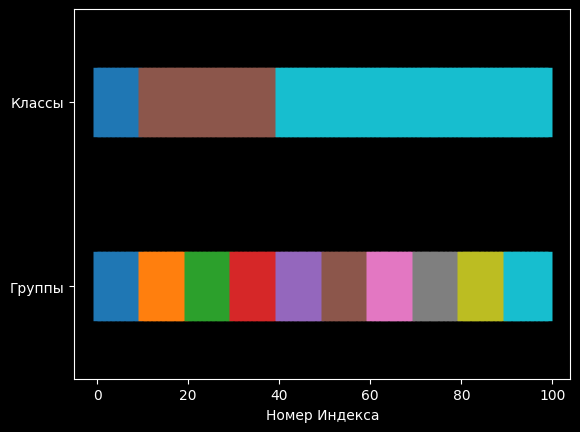

In [ ]:
visualize_groups(y, groups, "no groups")

**Визуализация "сырых" данных**

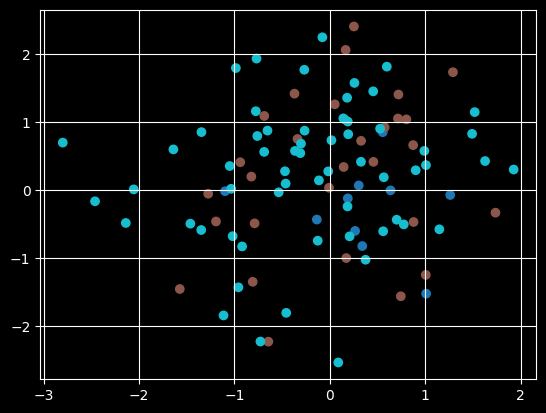

In [ ]:
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=y, cmap=cmap_data,);
plt.grid();

**Функция для Визуализации данных кросс-валидации**

In [ ]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """демонстрационный график для индексов кросс-валидации проверки."""

    # визуализация тренировочных/тестовых данных для каждого разделения
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # заполнение индексов тренировочными/тестовыми группами
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # визуализация результатов
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # ну и визуализация данных о классах / группах
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # что-то про форматирование и красоту
    yticklabels = list(range(n_splits)) + ["Классы", "Группы"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Номер Индекса",
        ylabel="Итерация кросс-валидации",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

In [ ]:
def plot_data_cv(X,y,group,cv,n_splits):
    fig,axs = plt.subplots(n_splits,2, figsize = (10,15))
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):

        plt.subplot(n_splits,2,2*ii+2)
        plt.scatter(X[tt,0],X[tt,1],c=y[tt], cmap=cmap_data,);
        if ii==0:
            plt.title('Тренировочные данные')
        plt.grid();
        plt.subplot(n_splits,2,2*ii+1)
        plt.scatter(X[tr,0],X[tr,1],c=y[tr], cmap=cmap_data,marker = 'd');
        if ii==0:
            plt.title('Тестовые данные')
        plt.grid();

# Начнем с Валидации по "умолчанию"

<Axes: title={'center': 'KFold'}, xlabel='Номер Индекса', ylabel='Итерация кросс-валидации'>

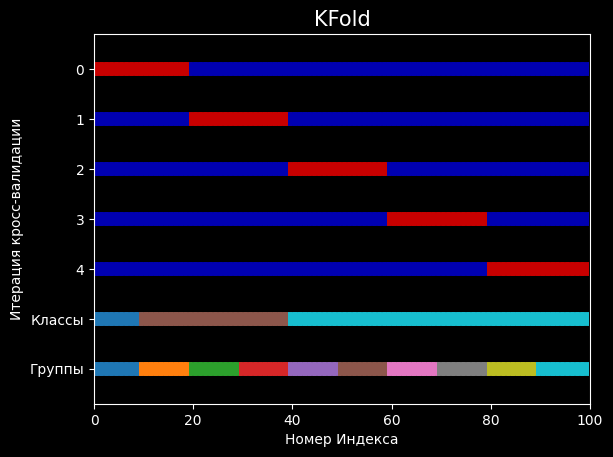

In [ ]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

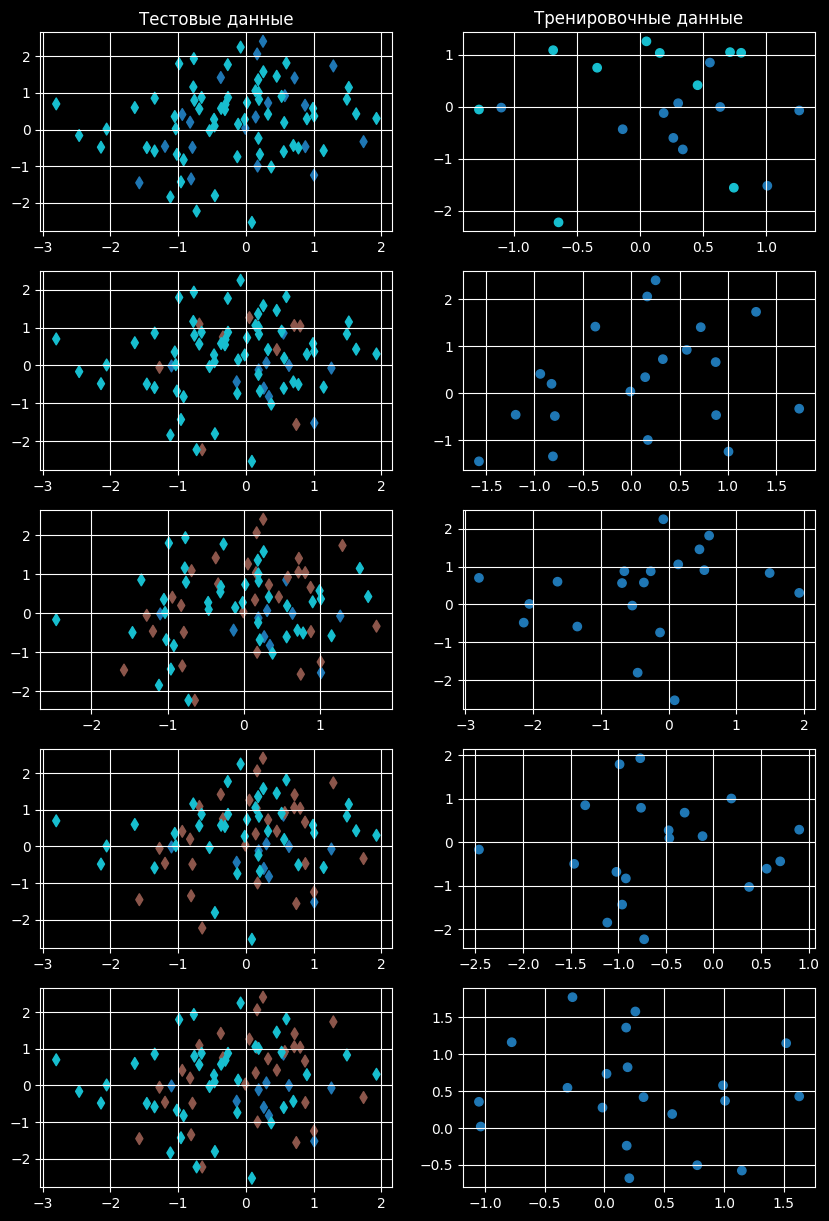

In [ ]:
plot_data_cv(X,y,groups,cv,n_splits)

# Разбиение с учетом Классов и Групп


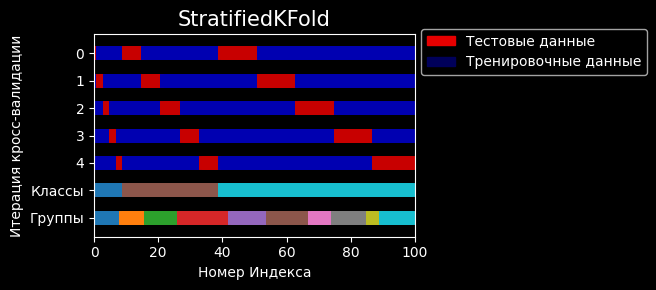

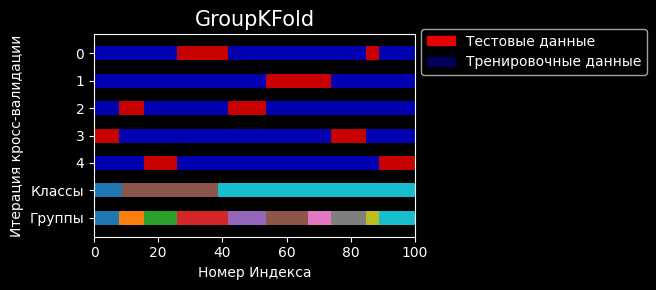

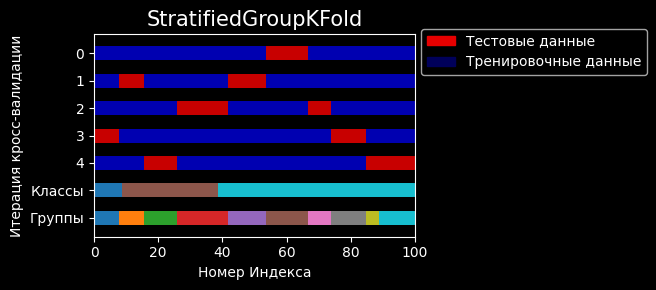

In [ ]:
uneven_groups = np.sort(np.random.randint(0, 10, n_points))

cvs = [StratifiedKFold, GroupKFold, StratifiedGroupKFold]

for cv in cvs:
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(cv(n_splits), X, y, uneven_groups, ax, n_splits)
    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Тестовые данные", "Тренировочные данные"],
        loc=(1.02, 0.8),
    )

    plt.tight_layout()
    fig.subplots_adjust(right=0.7)

# Разное

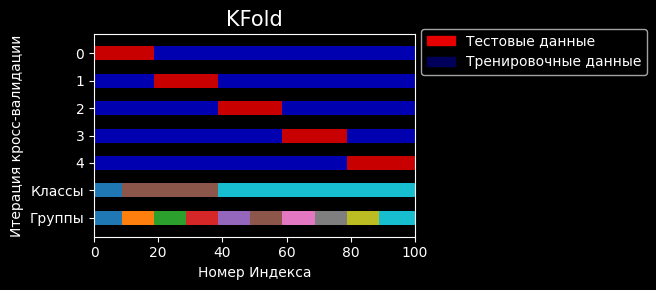

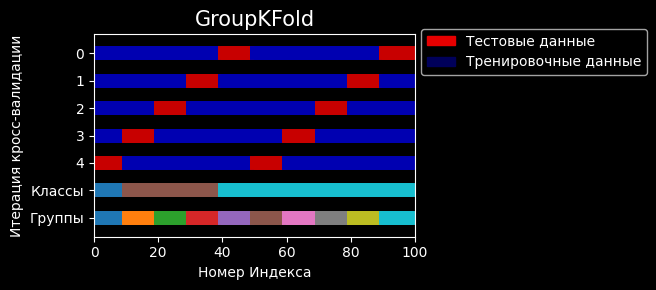

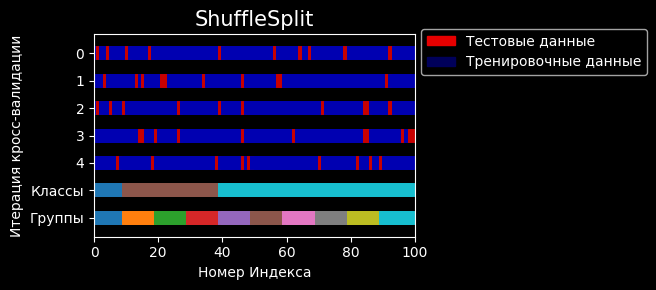

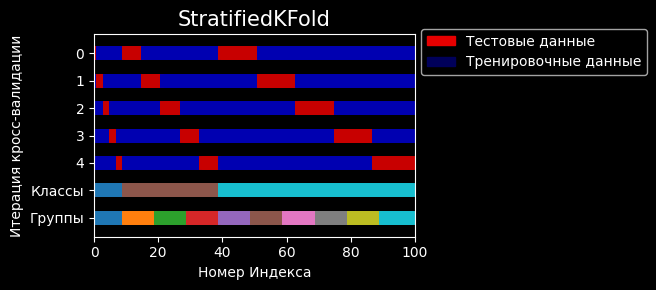

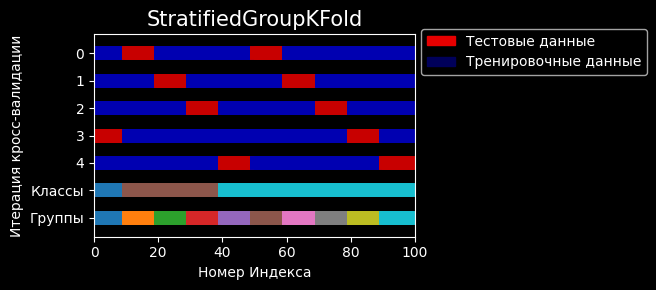

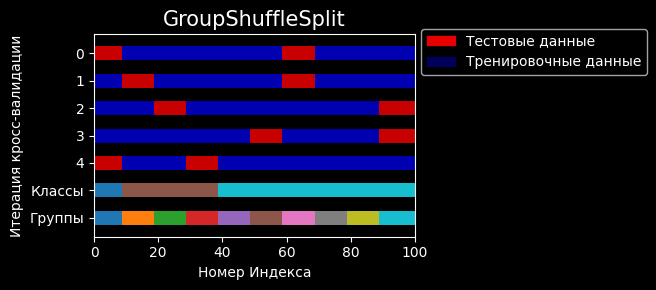

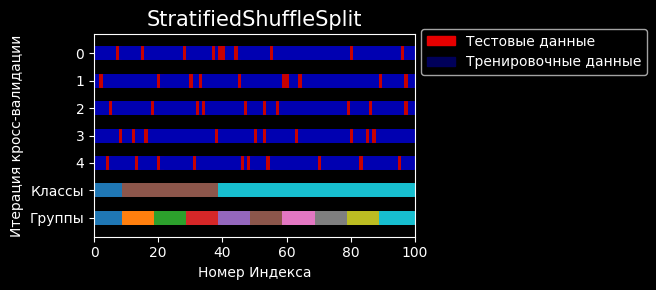

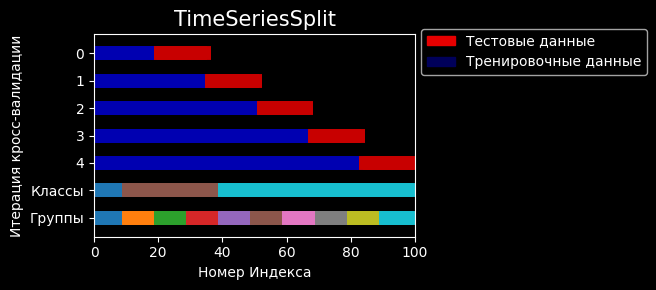

In [ ]:
cvs = [
    KFold,
    GroupKFold,
    ShuffleSplit,
    StratifiedKFold,
    StratifiedGroupKFold,
    GroupShuffleSplit,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Тестовые данные", "Тренировочные данные"],
        loc=(1.02, 0.8),
    )

    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
plt.show()